# **Importations des donnees**

In [194]:
# Importation des librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#data split
from sklearn.model_selection import train_test_split
#encondage des donnees
from sklearn.preprocessing import LabelEncoder
# Standarisation des donnees
from sklearn.preprocessing import StandardScaler
# detection des outliers
from datasist.structdata import detect_outliers

# nan value
from sklearn.impute import SimpleImputer
# machine learning model 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# evaluation de model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# enrengistrement de model

# **Data decovery**

In [195]:
df = pd.read_csv('titanic_modified.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Adjusted_Survived
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,0,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        418 non-null    int64  
 1   Survived           418 non-null    int64  
 2   Pclass             418 non-null    int64  
 3   Name               418 non-null    object 
 4   Sex                418 non-null    object 
 5   Age                332 non-null    float64
 6   SibSp              418 non-null    int64  
 7   Parch              418 non-null    int64  
 8   Ticket             418 non-null    object 
 9   Fare               417 non-null    float64
 10  Cabin              91 non-null     object 
 11  Embarked           418 non-null    object 
 12  Adjusted_Survived  418 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 42.6+ KB


In [197]:
df.shape

(418, 13)

In [198]:
print(len(df))

418


In [199]:
print(df.isnull().sum())

PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                   86
SibSp                  0
Parch                  0
Ticket                 0
Fare                   1
Cabin                327
Embarked               0
Adjusted_Survived      0
dtype: int64


In [200]:
( df.isna().sum() / df.shape[0] * 100)

PassengerId           0.000000
Survived              0.000000
Pclass                0.000000
Name                  0.000000
Sex                   0.000000
Age                  20.574163
SibSp                 0.000000
Parch                 0.000000
Ticket                0.000000
Fare                  0.239234
Cabin                78.229665
Embarked              0.000000
Adjusted_Survived     0.000000
dtype: float64

<Axes: >

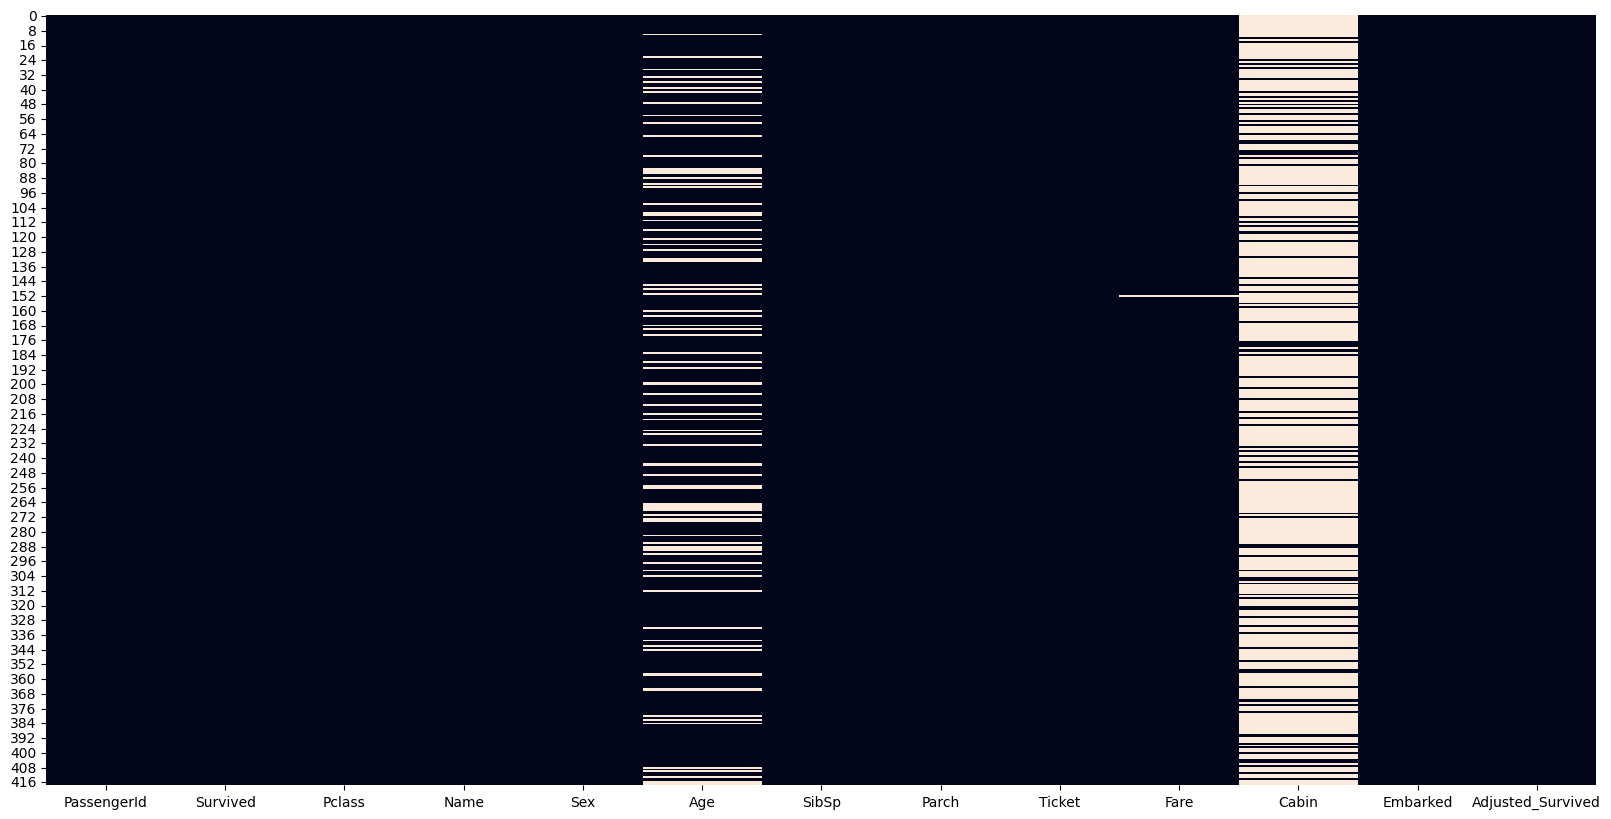

In [201]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [202]:
for review in df['Survived'].unique():
    print(review)

0
1


In [203]:
for review in df['Pclass'].unique():
    print(review)

3
2
1


In [204]:
for review in df['Name'].unique():
    print(review)

Kelly, Mr. James
Wilkes, Mrs. James (Ellen Needs)
Myles, Mr. Thomas Francis
Wirz, Mr. Albert
Hirvonen, Mrs. Alexander (Helga E Lindqvist)
Svensson, Mr. Johan Cervin
Connolly, Miss. Kate
Caldwell, Mr. Albert Francis
Abrahim, Mrs. Joseph (Sophie Halaut Easu)
Davies, Mr. John Samuel
Ilieff, Mr. Ylio
Jones, Mr. Charles Cresson
Snyder, Mrs. John Pillsbury (Nelle Stevenson)
Howard, Mr. Benjamin
Chaffee, Mrs. Herbert Fuller (Carrie Constance Toogood)
del Carlo, Mrs. Sebastiano (Argenia Genovesi)
Keane, Mr. Daniel
Assaf, Mr. Gerios
Ilmakangas, Miss. Ida Livija
Assaf Khalil, Mrs. Mariana (Miriam")"
Rothschild, Mr. Martin
Olsen, Master. Artur Karl
Flegenheim, Mrs. Alfred (Antoinette)
Williams, Mr. Richard Norris II
Ryerson, Mrs. Arthur Larned (Emily Maria Borie)
Robins, Mr. Alexander A
Ostby, Miss. Helene Ragnhild
Daher, Mr. Shedid
Brady, Mr. John Bertram
Samaan, Mr. Elias
Louch, Mr. Charles Alexander
Jefferys, Mr. Clifford Thomas
Dean, Mrs. Bertram (Eva Georgetta Light)
Johnston, Mrs. Andrew G 

In [205]:
for review in df['Sex'].unique():
    print(review)

male
female


In [206]:
for review in df['Age'].unique():
    print(review)

34.5
47.0
62.0
27.0
22.0
14.0
30.0
26.0
18.0
21.0
nan
46.0
23.0
63.0
24.0
35.0
45.0
55.0
9.0
48.0
50.0
22.5
41.0
33.0
18.5
25.0
39.0
60.0
36.0
20.0
28.0
10.0
17.0
32.0
13.0
31.0
29.0
28.5
32.5
6.0
67.0
49.0
2.0
76.0
43.0
16.0
1.0
12.0
42.0
53.0
26.5
40.0
61.0
60.5
7.0
15.0
54.0
64.0
37.0
34.0
11.5
8.0
0.33
38.0
57.0
40.5
0.92
19.0
36.5
0.75
0.83
58.0
0.17
59.0
14.5
44.0
5.0
51.0
3.0
38.5


In [207]:
for review in df['SibSp'].unique():
    print(review)

0
1
2
3
4
5
8


In [208]:
for review in df['Parch'].unique():
    print(review)

0
1
3
2
4
6
5
9


In [209]:
for review in df['Ticket'].unique():
    print(review)

330911
363272
240276
315154
3101298
7538
330972
248738
2657
A/4 48871
349220
694
21228
24065
W.E.P. 5734
SC/PARIS 2167
233734
2692
STON/O2. 3101270
2696
PC 17603
C 17368
PC 17598
PC 17597
PC 17608
A/5. 3337
113509
2698
113054
2662
SC/AH 3085
C.A. 31029
C.A. 2315
W./C. 6607
13236
2682
342712
315087
345768
1601
349256
113778
SOTON/O.Q. 3101263
237249
11753
STON/O 2. 3101291
PC 17594
370374
11813
C.A. 37671
13695
SC/PARIS 2168
29105
19950
SC/A.3 2861
382652
349230
348122
386525
349232
237216
347090
334914
F.C.C. 13534
330963
113796
2543
382653
349211
3101297
PC 17562
113503
359306
11770
248744
368702
2678
PC 17483
19924
349238
240261
2660
330844
A/4 31416
364856
29103
347072
345498
F.C. 12750
376563
13905
350033
19877
STON/O 2. 3101268
347471
A./5. 3338
11778
228414
365235
347070
2625
C 4001
330920
383162
3410
248734
237734
330968
PC 17531
329944
2680
2681
PP 9549
13050
SC/AH 29037
C.A. 33595
367227
392095
368783
371362
350045
367226
211535
342441
STON/OQ. 369943
113780
4133
2621
349226
3

In [210]:
for review in df['Fare'].unique():
    print(review)

7.8292
7.0
9.6875
8.6625
12.2875
9.225
7.6292
29.0
7.2292
24.15
7.8958
26.0
82.2667
61.175
27.7208
12.35
7.225
7.925
59.4
3.1708
31.6833
61.3792
262.375
14.5
61.9792
30.5
21.6792
31.5
20.575
23.45
57.75
8.05
9.5
56.4958
13.4167
26.55
7.85
13.0
52.5542
29.7
7.75
76.2917
15.9
60.0
15.0333
23.0
263.0
15.5792
29.125
7.65
16.1
13.5
7.725
21.0
7.8792
42.4
28.5375
211.5
25.7
15.2458
221.7792
10.7083
14.4542
13.9
7.775
52.0
7.7958
78.85
7.8542
55.4417
8.5167
22.525
7.8208
8.7125
15.0458
7.7792
31.6792
7.2833
6.4375
16.7
75.2417
15.75
7.25
23.25
28.5
25.4667
46.9
151.55
18.0
51.8625
83.1583
nan
12.1833
31.3875
7.55
13.775
7.7333
22.025
50.4958
34.375
8.9625
39.0
36.75
53.1
247.5208
16.0
69.55
32.5
134.5
10.5
8.1125
15.5
14.4
227.525
25.7417
7.05
73.5
42.5
164.8667
13.8583
27.4458
15.1
65.0
6.4958
71.2833
75.25
106.425
30.0
7.8875
27.75
136.7792
9.325
17.4
12.7375
0.0
20.2125
39.6
6.95
81.8583
41.5792
45.5
9.35
93.5
14.1083
7.575
135.6333
146.5208
211.3375
79.2
15.7417
7.5792
512.3292
63.3583
51

In [211]:
for review in df['Cabin'].unique():
    print(review)

nan
B45
E31
B57 B59 B63 B66
B36
A21
C78
D34
D19
A9
D15
C31
C23 C25 C27
F G63
B61
C53
D43
C130
C132
C101
C55 C57
B71
C46
C116
F
A29
G6
C6
C28
C51
E46
C54
C97
D22
B10
F4
E45
E52
D30
B58 B60
E34
C62 C64
A11
B11
C80
F33
C85
D37
C86
D21
C89
F E46
A34
D
B26
C22 C26
B69
C32
B78
F E57
F2
A18
C106
B51 B53 B55
D10 D12
E60
E50
E39 E41
B52 B54 B56
C39
B24
D28
B41
C7
D40
D38
C105


In [212]:
for review in df['Embarked'].unique():
    print(review)

Q
S
C


# the conclusion
pclass: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower

cabin	Cabin number

fare	Passenger fare

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

Some children travelled only with a nanny, therefore parch=0 for them.

# **Preprocessing data**

# feature selection

In [213]:
df = df.drop('Name',axis=1)
df = df.drop('Ticket',axis=1)
df = df.drop('Cabin',axis=1)
df = df.drop('Fare',axis=1)
df = df.drop('PassengerId',axis=1)

In [214]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Adjusted_Survived
0,0,3,male,34.5,0,0,Q,0
1,0,3,female,47.0,1,0,S,0
2,0,2,male,62.0,0,0,Q,0
3,0,3,male,27.0,0,0,S,0
4,1,3,female,22.0,1,1,S,1


# dealing with the null values 

<Axes: >

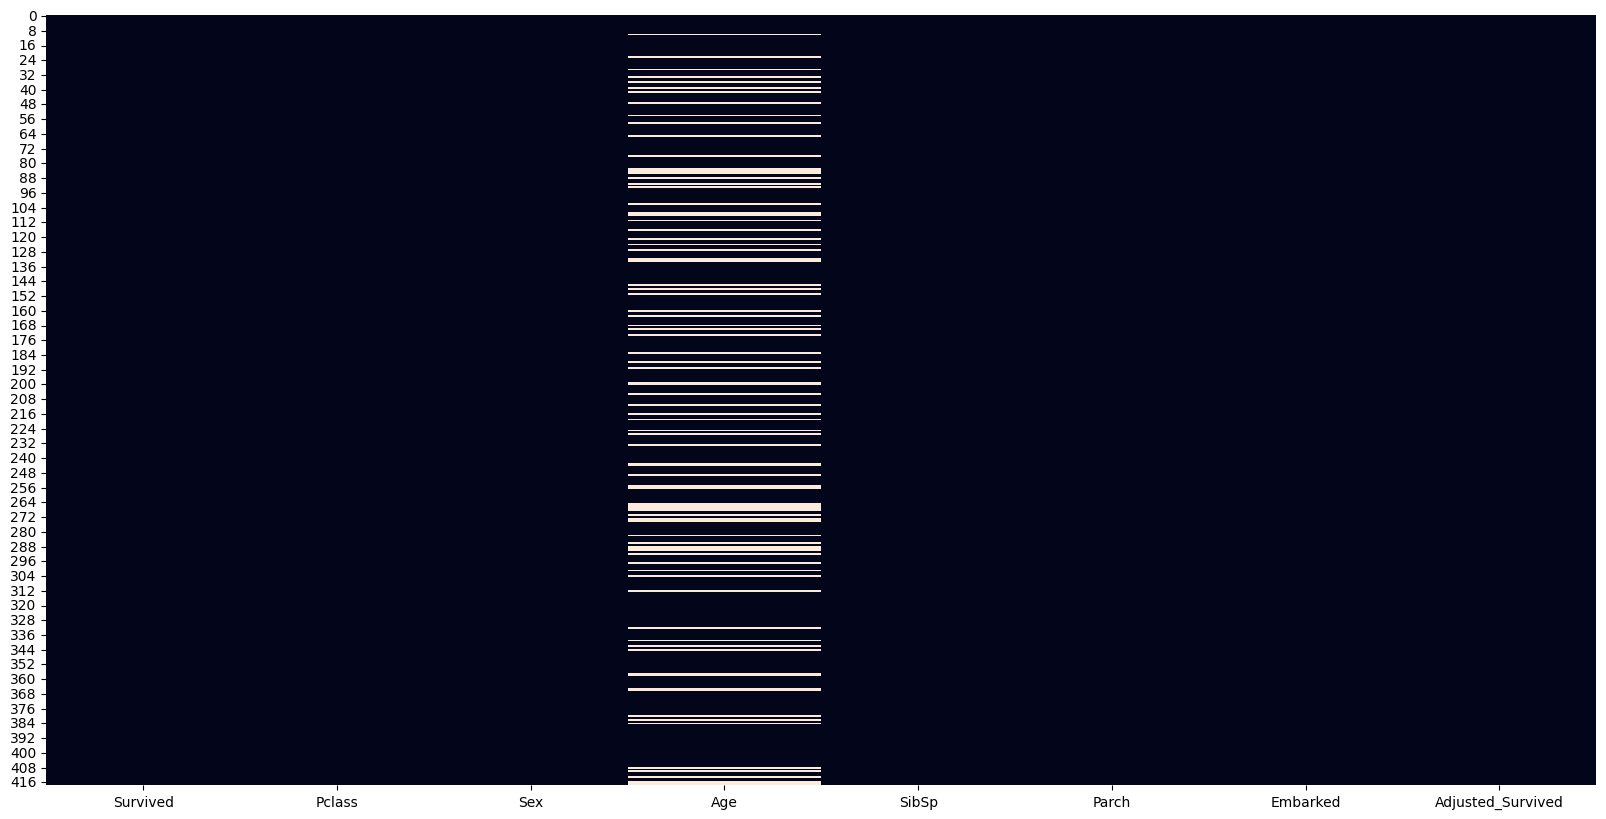

In [215]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [216]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=3)  # Specify the number of neighbors

# Apply the imputer to the relevant columns
df[['Age']] = knn_imputer.fit_transform(df[['Age']])

<Axes: >

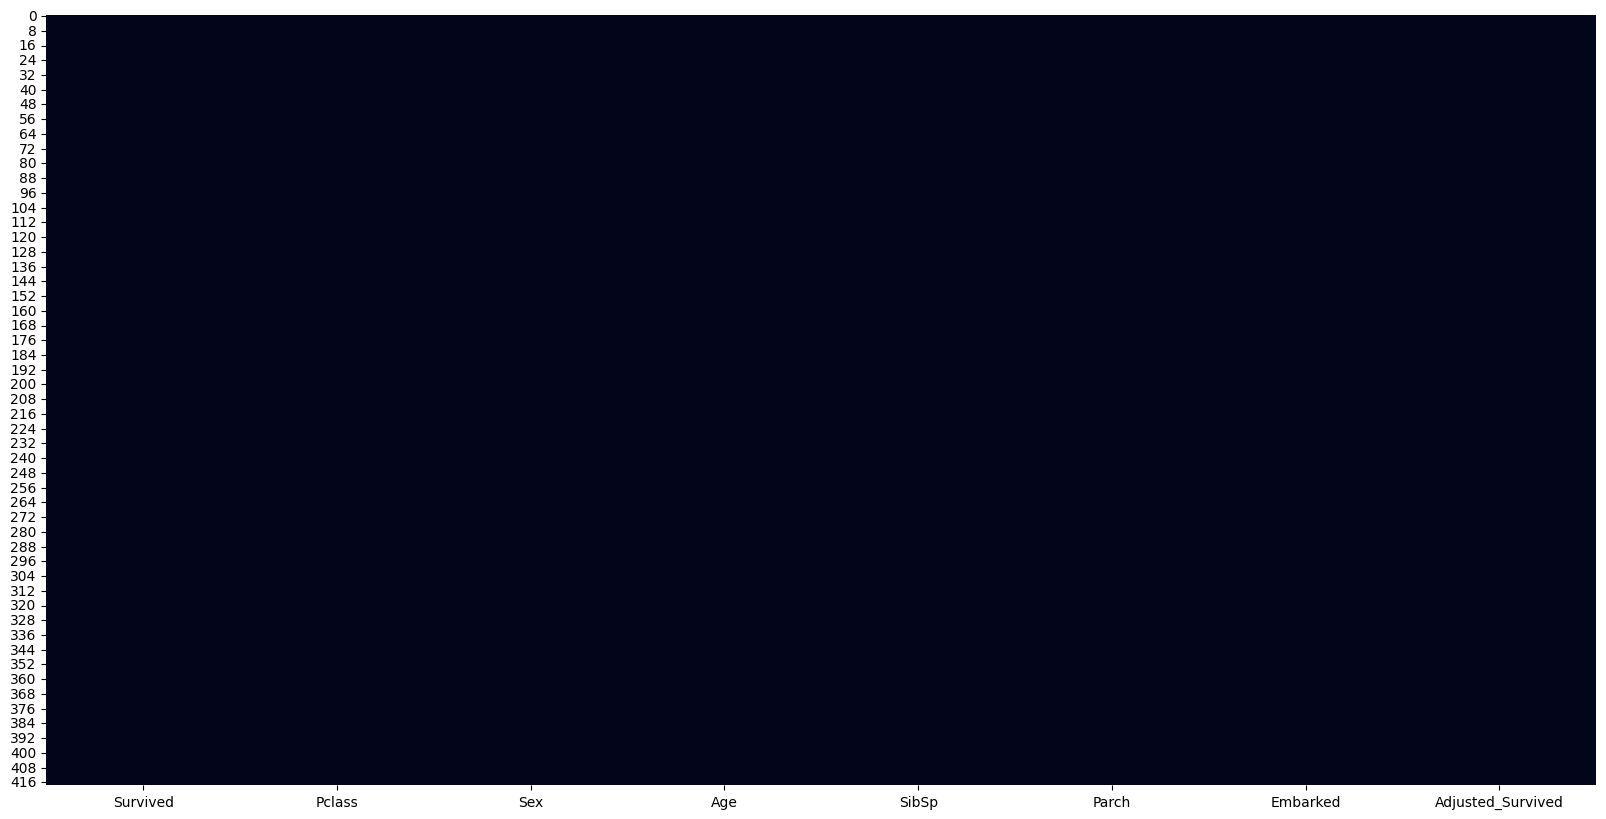

In [217]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Survived           418 non-null    int64  
 1   Pclass             418 non-null    int64  
 2   Sex                418 non-null    object 
 3   Age                418 non-null    float64
 4   SibSp              418 non-null    int64  
 5   Parch              418 non-null    int64  
 6   Embarked           418 non-null    object 
 7   Adjusted_Survived  418 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 26.3+ KB


In [219]:
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Survived           418 non-null    int64  
 1   Pclass             418 non-null    int64  
 2   Sex                418 non-null    int32  
 3   Age                418 non-null    float64
 4   SibSp              418 non-null    int64  
 5   Parch              418 non-null    int64  
 6   Embarked           418 non-null    int32  
 7   Adjusted_Survived  418 non-null    int64  
dtypes: float64(1), int32(2), int64(5)
memory usage: 23.0 KB


In [221]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Adjusted_Survived
0,0,3,1,34.5,0,0,1,0
1,0,3,0,47.0,1,0,2,0
2,0,2,1,62.0,0,0,1,0
3,0,3,1,27.0,0,0,2,0
4,1,3,0,22.0,1,1,2,1


# applying feature engeeniring

In [222]:
df['isalone'] = ((df['SibSp'] == 0) & (df['Parch'] == 0)).astype(int)

In [223]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Adjusted_Survived,isalone
0,0,3,1,34.5,0,0,1,0,1
1,0,3,0,47.0,1,0,2,0,0
2,0,2,1,62.0,0,0,1,0,1
3,0,3,1,27.0,0,0,2,0,1
4,1,3,0,22.0,1,1,2,1,0


In [224]:
df = df.drop(['SibSp', 'Parch'], axis=1)

In [225]:
df.head()

,Survived,Pclass,Sex,Age,Embarked,Adjusted_Survived,isalone
0,0,3,1,34.5,1,0,1
1,0,3,0,47.0,2,0,0
2,0,2,1,62.0,1,0,1
3,0,3,1,27.0,2,0,1
4,1,3,0,22.0,2,1,0


# **EDA**


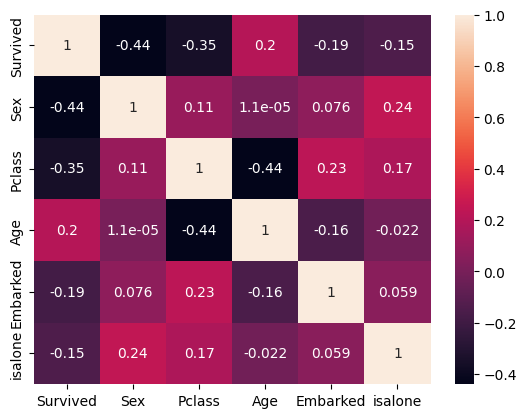

In [226]:
numerical = ['Survived', 'Sex','Pclass','Age','Embarked','isalone']

corr_matrix = df[numerical].corr()

# Plotting the heatmap
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [227]:
# Filter the dataset for males only (encoded as 1)
male_df = df[df['Sex'] == 1]

# Count the number of Survived and Not Survived for males
survival_count_males = male_df['Survived'].value_counts().reset_index()

# Rename the columns for clarity
survival_count_males.columns = ['Survived', 'Count']

# Display the table
print(survival_count_males)


   Survived  Count
0         0    205
1         1     61


In [228]:
# Filter the dataset for males only and count the number of survivors (Survived == 1)
male_survived_count = male_df[male_df['Survived'] == 1].shape[0]

# Print the count of males that survived
print(f"Number of males who survived: {male_survived_count}")


Number of males who survived: 61


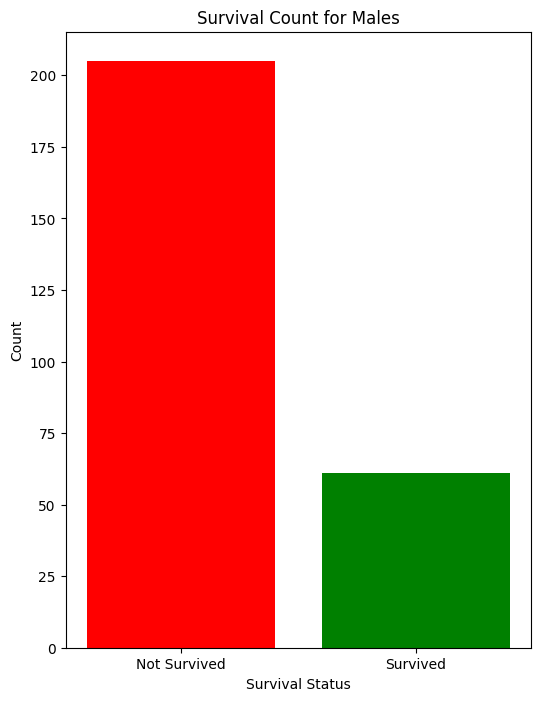

   Survived  Count
0         0    205
1         1     61


In [229]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataset for males only
male_df = df[df['Sex'] == 1]

# Count the number of survived and not survived males
survival_counts = male_df.groupby('Survived').size().reset_index(name='Count')

# Plotting the count of Survived and Not Survived for males
plt.figure(figsize=(6, 8))
plt.bar(survival_counts['Survived'], survival_counts['Count'], color=['red', 'green'])

# Add labels and title
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.title('Survival Count for Males')
plt.xlabel('Survival Status')
plt.ylabel('Count')

# Display the plot
plt.show()

# Display the table with counts of Survived and Not Survived males
print(survival_counts)


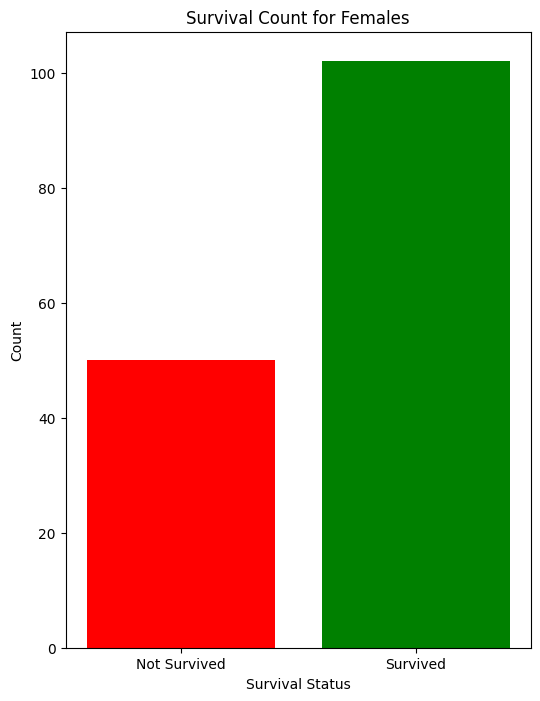

   Survived  Count
0         0     50
1         1    102


In [230]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataset for females only
female_df = df[df['Sex'] == 0]

# Count the number of survived and not survived females
survival_counts_female = female_df.groupby('Survived').size().reset_index(name='Count')

# Plotting the count of Survived and Not Survived for females
plt.figure(figsize=(6, 8))
plt.bar(survival_counts_female['Survived'], survival_counts_female['Count'], color=['red', 'green'])

# Add labels and title
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.title('Survival Count for Females')
plt.xlabel('Survival Status')
plt.ylabel('Count')

# Display the plot
plt.show()

# Display the table with counts of Survived and Not Survived females
print(survival_counts_female)


In [231]:
import pandas as pd
import numpy as np

def modify_titanic_dataset(df, output_file):
    # Load the dataset
    data = pd.read_csv(df)
    
    # Ensure reproducibility
    np.random.seed(42)
    
    # Define survival probabilities by Sex and Pclass
    female_survival_probs = {1: 0.95, 2: 0.75, 3: 0.5}
    male_survival_probs = {1: 0.5, 2: 0.25, 3: 0.1}
    
    # Adjust survival based on probabilities
    adjusted_survived = []
    for _, row in data.iterrows():
        if row['Sex'] == 'female':
            survival_prob = female_survival_probs[row['Pclass']]
        else:
            survival_prob = male_survival_probs[row['Pclass']]
        
        # Randomize survival outcome
        adjusted_survived.append(1 if np.random.rand() < survival_prob else 0)
    
    # Replace the 'Survived' column with the adjusted values
    data['Survived'] = adjusted_survived
    
    # Save the modified dataset
    data.to_csv(output_file, index=False)
    print(f"Modified dataset saved to {output_file}")

# Example usage
input_csv = "titanic.csv"  # Replace with your input file path
output_csv = "titanic_modified.csv"  # Replace with your desired output file path
modify_titanic_dataset(input_csv, output_csv)


Modified dataset saved to titanic_modified.csv
